# SMS Spam Or Ham Detection
- Dataset Information:
Dataset has one label and one features, label as (Spam or Ham) and Features as (text messages), We will train this data and will build machine learning model, you could apply streamlit library  for this ML Model and build one end to end Deployed application for detection of SMS Spam or Ham detection 

### Importing Packages

In [62]:
import re 
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

### Loading Dataset

In [8]:
df = pd.read_csv('SMSSpamCollection',sep='\t')
df_columns = ['labels','text']
df.columns = df_columns
df.head()

,labels,text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


### Information about dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  5571 non-null   object
 1   text    5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Checking for the NaN values in dataset

In [10]:
df.isnull().sum()

labels    0
text      0
dtype: int64

### Checking Value count for labels
- ham has 4824 number instances and spam has 747 number of instances, which might leads to us 

In [11]:
df['labels'].value_counts()

ham     4824
spam     747
Name: labels, dtype: int64

### Splitting into features and label

In [18]:
df_features = df.drop('labels',axis=1)
df_label = df[['labels']]
print(df_features.head())
print(df_label.head())

                                                text
0                      Ok lar... Joking wif u oni...
1  Free entry in 2 a wkly comp to win FA Cup fina...
2  U dun say so early hor... U c already then say...
3  Nah I don't think he goes to usf, he lives aro...
4  FreeMsg Hey there darling it's been 3 week's n...
  labels
0    ham
1   spam
2    ham
3    ham
4   spam


## Data Preprocessing
- Data Cleaning
- Label Encoding
- Token vectorization
- SMOTE: Synthetic Minority Oversampling Technique
- Train test split

### Data Cleaning

In [22]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove usernames
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Remove retweets
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove URLs
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters (including emojis)
    text = re.sub(r'\.{3,}',' ',text)
    return text

df_features['cleaned_text'] = df_features['text'].apply(clean_text) 
df_features['cleaned_text'].head()

0                            ok lar  joking wif u oni 
1    free entry in 2 a wkly comp to win fa cup fina...
2        u dun say so early hor  u c already then say 
3    nah i don't think he goes to usf, he lives aro...
4    freemsg hey there darling it's been 3 week's n...
Name: cleaned_text, dtype: object

### Label Encoding

In [33]:
encoder = LabelEncoder()
df_label_encoded = encoder.fit_transform(df_label)
print(df_label_encoded.shape)

(5571,)


c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Token vectorization

In [34]:
vectorizer = TfidfVectorizer(max_features=1000,stop_words='english')
df_features_vectorized = vectorizer.fit_transform(df_features['cleaned_text']).toarray()
print(df_features_vectorized.shape)

(5571, 1000)


### SMOTE: Synthetic Minority Oversampling Technique

In [38]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(df_features_vectorized,df_label_encoded)
print(X_resampled.shape,y_resampled.shape)
print(pd.DataFrame(y_resampled,columns=df_label.columns).value_counts())

(9648, 1000) (9648,)
labels
0         4824
1         4824
dtype: int64


### Train Test split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(7718, 1000) (1930, 1000)
(7718,) (1930,)


## Model Building
- Model Selection
- Model Evaluation
    - Cross Val Score
    - Cross Val Predict
    - Confustion Matrix
    - Precision, Recall, F1 Scoring
- Model Hyperparameter
- Fitting Model on Test set

### Model Selection

In [43]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
logistic_clf = LogisticRegression()

### Model Evaluation

### Cross Val Score

In [45]:
knn_score = cross_val_score(estimator = knn_clf,X=X_train,y=y_train,scoring='accuracy',cv=5)
logistic_score = cross_val_score(estimator = logistic_clf,X=X_train,y=y_train,scoring='accuracy',cv=5)
print(knn_score.mean()) 
print(logistic_score.mean())

0.81394187018761
0.9576323291884794


### Cross Val Predict

In [46]:
knn_pred = cross_val_predict(knn_clf,X=X_train,y=y_train,cv=5)
logistic_pred = cross_val_predict(logistic_clf,X=X_train,y=y_train,cv=5)

### Confusion Matrix

In [50]:
knn_conf_mat = confusion_matrix(y_true=y_train,y_pred=knn_pred)
logistic_conf_mat = confusion_matrix(y_true=y_train,y_pred=logistic_pred)

### KNN Confustion Matrix

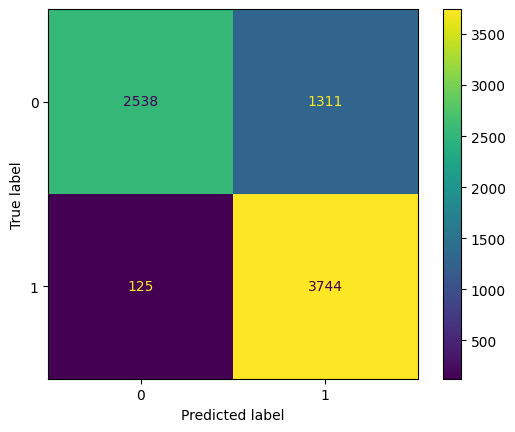

In [51]:
knn_conf_mat_plot = ConfusionMatrixDisplay(confusion_matrix=knn_conf_mat).plot()
plt.show()

### KNN Precision, Recall, F1 Score

In [53]:
precision = precision_score(y_true=y_train,y_pred=knn_pred)
recall = recall_score(y_true=y_train,y_pred=knn_pred)
f1 = f1_score(y_true=y_train,y_pred=knn_pred)
print(precision)
print(recall)
print(f1)

0.7406528189910979
0.9676919100542776
0.8390856118332586


### Logistic Reg. Confusion Matrix

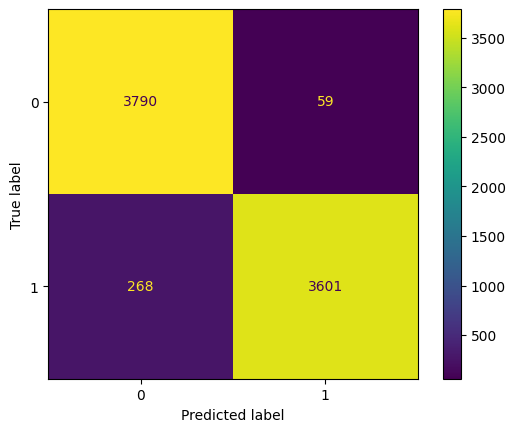

In [52]:
logistic_conf_mat_plot = ConfusionMatrixDisplay(confusion_matrix=logistic_conf_mat).plot()
plt.show()

### Logistic Reg. Precision, Recall, F1 Score

In [54]:
precision = precision_score(y_true=y_train,y_pred=logistic_pred)
recall = recall_score(y_true=y_train,y_pred=logistic_pred)
f1 = f1_score(y_true=y_train,y_pred=logistic_pred)
print(precision)
print(recall)
print(f1)

0.983879781420765
0.9307314551563711
0.9565679373090716


### Model Hyperparamter Tuning

In [56]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=logistic_clf,param_grid=param_grid,cv=3)
grid_search.fit(X_train,y_train)

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

### Display Model Score

In [59]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

LogisticRegression(C=100, solver='saga')
{'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
0.973179730410127


### Model Fitting on Test set

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       975
           1       0.97      0.98      0.97       955

    accuracy                           0.97      1930
   macro avg       0.97      0.97      0.97      1930
weighted avg       0.97      0.97      0.97      1930



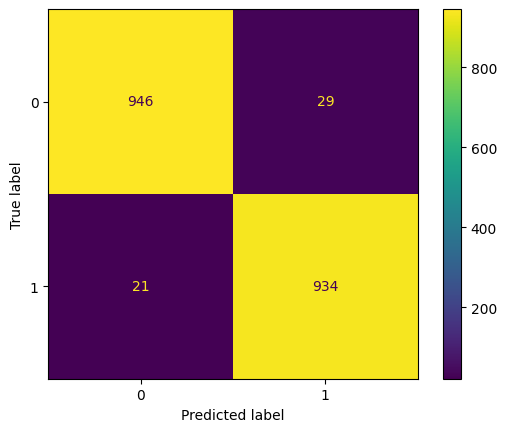

In [64]:
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
final_model_conf_mat = confusion_matrix(y_true=y_test,y_pred=y_pred)
final_model_conf_mat_plot = ConfusionMatrixDisplay(final_model_conf_mat).plot()
plt.show()

### `NOTE:` SMS Spam and Ham detection, End to End Machine learning Model. Visit More: www.github.com/itechdp